# Excercise1
# Exploratory data analysis : Haberman's Survival Dataset.

# Objective:
To find the survivability of the cancer patients for duration of 5 years using features age,operation_year and axil_node values by exploratory data analysis.

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [0]:
#load dataset
# Add column titles to the dataset using name option.

df = pd.read_csv('haberman.csv')

In [0]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Observations:
1. The column names are absent in the dataset

In [0]:
# Adding the column names
df.columns = ['age','op_year','axil_nodes','survival_status']

In [0]:
df.head() #added column names

,age,op_year,axil_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
df.shape #3 features 1 label

(305, 4)

# Summary of the dataset

In [0]:
df.describe()

,age,op_year,axil_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
 #changing the labels to string to prevent it from getting graphed.
    
df['survival_status'] = df['survival_status'].map(lambda x:'y' if x == 1 else 'n') 

In [0]:
df.head()

,age,op_year,axil_nodes,survival_status
0,30,62,3,y
1,30,65,0,y
2,31,59,2,y
3,31,65,4,y
4,33,58,10,y


The labels are converted to strings to prevent it from being graphed.

In [0]:
df['survival_status'].value_counts()  #unbalanced dataset

y    224
n     81
Name: survival_status, dtype: int64

Observations:
1. The number of datapoints are uneven : unbalanced dataset.

# Bivariate analysis(scatter plot ,pairplots)

# 2D scatter plot

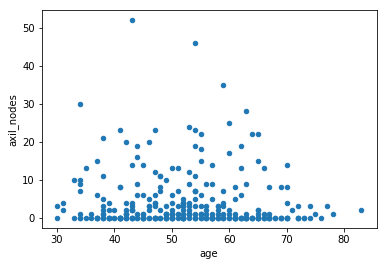

In [0]:
df.plot(kind="scatter",x="age",y="axil_nodes",legend=True);  
#plt.legend();
plt.show()

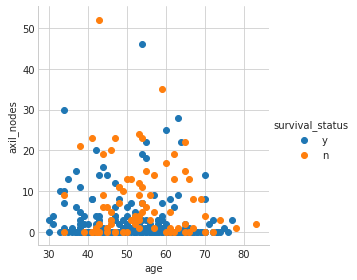

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival_status",size=4).map(plt.scatter,"age","axil_nodes").add_legend();
plt.show();

Observations:

1. The data is mixed and cannot be seperated with a line.
2. Most positive cases i.e., y lie close to the x axis.

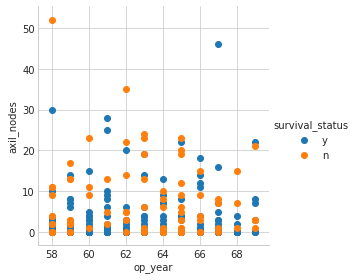

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival_status",size=4).map(plt.scatter,"op_year","axil_nodes").add_legend();
plt.show();

Observations :

1. There is no linear relationship between op_year and axil_nodes.
2. The major part of positive cases are close to zero in the y axis.

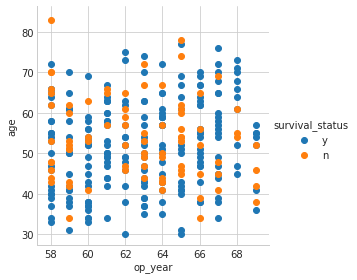

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival_status",size=4).map(plt.scatter,"op_year","age").add_legend();
plt.show();

# Pair plot

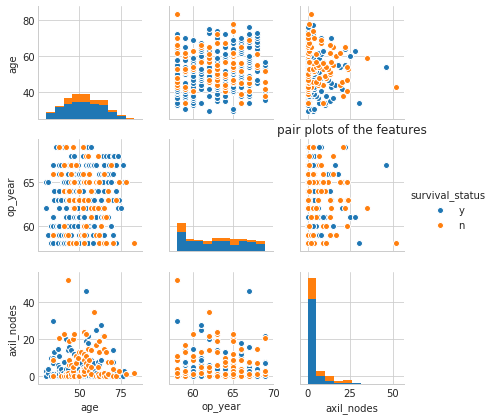

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df,hue="survival_status",size=2)
plt.title("pair plots of the features")
plt.show()

Observations :

1. Axil_nodes seems to be the most useful feature among the three.
2. Graphs plotted with operation_year or age is discontinous.
3. Graphs with Axil_nodes either in x or y axis is most helpful. 

# Univariate Analysis(Histograms, pdf, cdf,Boxplots,ViolinPlots).

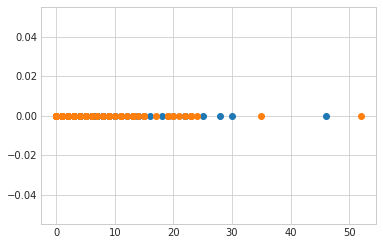

In [0]:
#creating seperate dataframes for the two labels.

survived = df.loc[df['survival_status'] == 'y']
deceased = df.loc[df['survival_status'] == 'n']

plt.plot(survived['axil_nodes'], np.zeros_like(survived['axil_nodes']), 'o')
plt.plot(deceased['axil_nodes'], np.zeros_like(deceased['axil_nodes']), 'o')

plt.show()

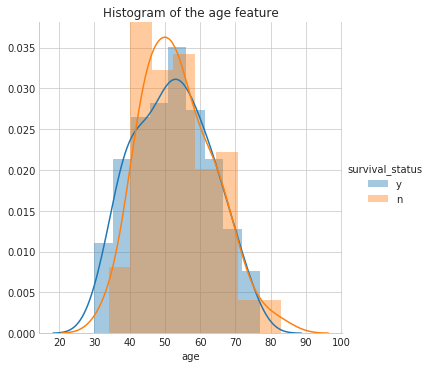

In [0]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "age").add_legend();
plt.title('Histogram of the age feature')
plt.show();

Observations :

1. Most deaths occur between age 40 to ~60.
2. while suvivability is high in the 50s.

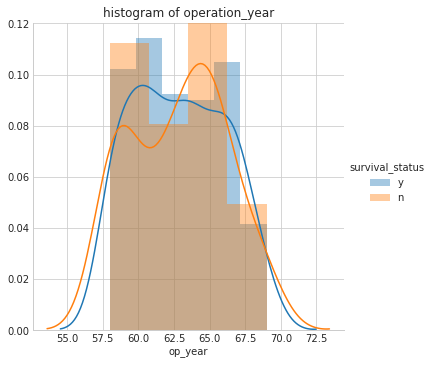

In [0]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "op_year").add_legend();
plt.title('histogram of operation_year')
plt.show();

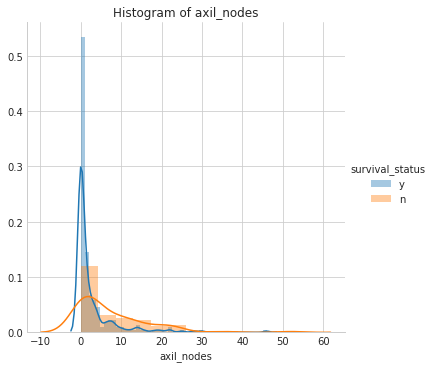

In [0]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "axil_nodes").add_legend();
plt.title('Histogram of axil_nodes')
plt.show();

Observations :

1. Axil_nodes value between 0 and ~2 has highest rate of survival.
2. whereas deaths occurs with value under ~5.

# PDF,CDF

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


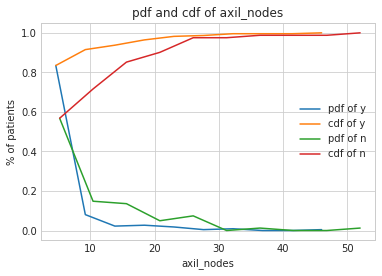

In [0]:
counts, bin_edges = np.histogram(survived['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.xlabel('axil_nodes')
plt.ylabel('% of patients')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges = np.histogram(deceased['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

label = ['pdf of y','cdf of y','pdf of n','cdf of n']

plt.title('pdf and cdf of axil_nodes')
plt.legend(label)
plt.show();

Observations:
1. The survivabilty is high when axil_node value are lower than ~15.


[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


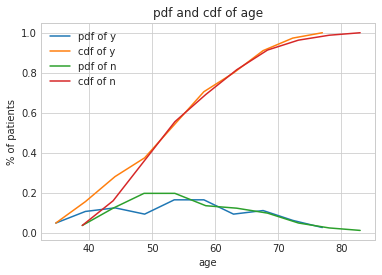

In [0]:
counts, bin_edges = np.histogram(survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.xlabel('age')
plt.ylabel('% of patients')

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges = np.histogram(deceased['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

label = ['pdf of y','cdf of y','pdf of n','cdf of n']
plt.title('pdf and cdf of age')

plt.legend(label)
plt.show()

Obsevations:
1. Deaths are higher around the age of ~50 ,while majority of  survivors are around ~50-60

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


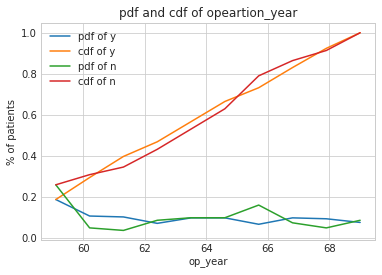

In [0]:
counts, bin_edges = np.histogram(survived['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.xlabel('op_year')
plt.ylabel('% of patients')

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges = np.histogram(deceased['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

label = ['pdf of y','cdf of y','pdf of n','cdf of n']
plt.title('pdf and cdf of opeartion_year')

plt.legend(label)
plt.show()

# Mean,Standard_deviation

In [0]:
print("Means:")
print("axil_nodes :")
print(np.mean(survived["axil_nodes"]))
print(np.mean(deceased["axil_nodes"]))

print("\nStandard deviation:")
print(np.std(survived["axil_nodes"]))
print(np.std(deceased["axil_nodes"]))

Means:
axil_nodes :
2.799107142857143
7.45679012345679

Standard deviation:
5.869092706952767
9.128776076761632


Observations:

1. The deceased had higher mean and standard_deviation value of axil_nodes compared to the survived.

In [0]:
print("median :")
print(np.median(survived["axil_nodes"]))
print(np.median(deceased["axil_nodes"]))

median :
0.0
4.0


In [0]:
print("\n quantiles:")

print(np.percentile(survived["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(deceased["axil_nodes"],np.arange(0, 100, 25)))

print("\n 90th percentiles:")
print(np.percentile(survived["axil_nodes"],90))
print(np.percentile(deceased["axil_nodes"],90))

from statsmodels import robust

print ("\n median absolute deviation")
print(robust.mad(survived["axil_nodes"]))
print(robust.mad(deceased["axil_nodes"]))



 quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

 90th percentiles:
8.0
20.0

 median absolute deviation
0.0
5.930408874022408


# Box plots,Violin plots

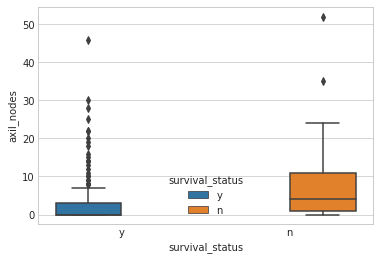

In [0]:
sns.boxplot(x="survival_status",y="axil_nodes",hue="survival_status",data=df);
plt.show();

Observations:

1. The 25th,50th percentiles of the survived is on the start of the plot,whisker,so survivability is high when the value is closer to 0.
2. the 25th percentile of the n class is at the same level as the y class ,75 percentile is at 11.


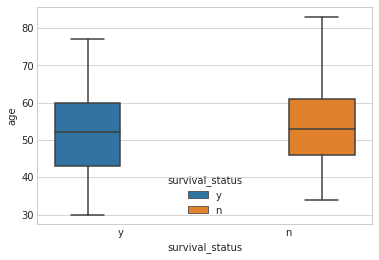

In [0]:
sns.boxplot(x="survival_status",y="age",hue="survival_status",data=df);
plt.show();

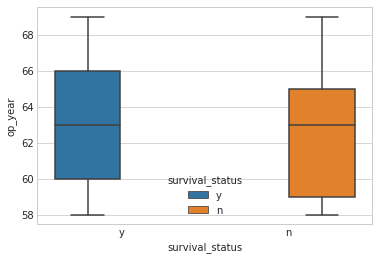

In [0]:
sns.boxplot(x="survival_status",y="op_year",hue="survival_status",data=df);
plt.show();

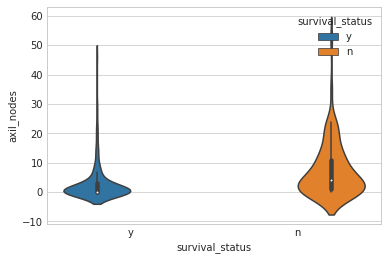

In [0]:
sns.violinplot(x="survival_status", y="axil_nodes",hue="survival_status", data=df, size=8)
plt.show()

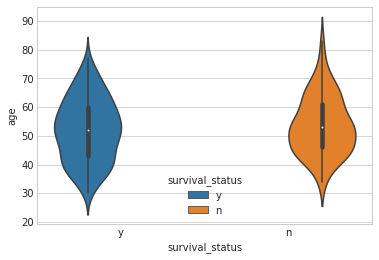

In [0]:
sns.violinplot(x="survival_status", y="age",hue="survival_status", data=df, size=8)
plt.show()

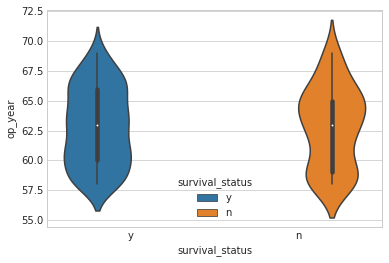

In [0]:
sns.violinplot(x="survival_status", y="op_year",hue="survival_status", data=df, size=8)
plt.show()

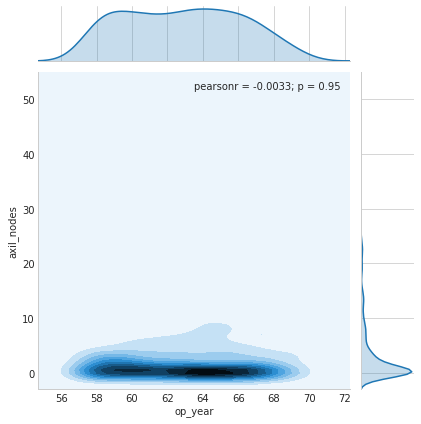

In [0]:
sns.jointplot(x="op_year", y="axil_nodes", data=df, kind="kde");
plt.show();

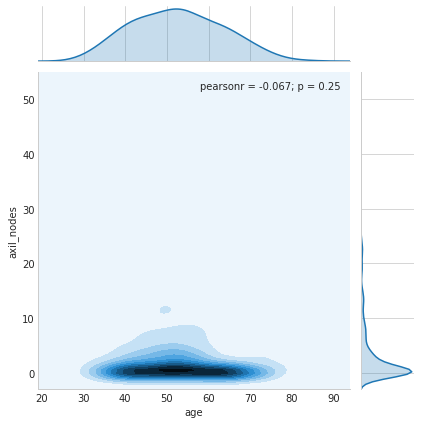

In [0]:
sns.jointplot(x="age", y="axil_nodes", data=df, kind="kde");
plt.show();

Observations:
1. The contour plot is highest where the axil_nodes is closer to zero for all the operation_years and age.

# Conclusion:
1. The dataset is unbalanced,225 for y and 81 for n .
2. op_year and age causes the graphs to be discontinous,axil_nodes is the most useful feature.
3. The graphs of the features has high overlapping and jumbled and cannot be easily seperated.
4. More features is necessary to perform any useful analysis. 